**Algoritmos de Aprendizaje Supervisado**

librerias

In [14]:
pip install numpy pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


importacion

In [7]:
import pandas as pd # Cargar y manipular el dataset.
import numpy as np # Realizar cálculos numéricos.
import matplotlib.pyplot as plt # Para la visualización de datos.
import seaborn as sns # Para la visualización de datos.
from sklearn.linear_model import LinearRegression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [27]:
## lectura de los datos y carga de variables en py

file_name = 'car data.csv'
path_data  = file_name
car_data = pd.read_csv(path_data)

In [203]:

print(car_data.info())  # Información general del DataFrame
print(car_data.describe())  # Descripción estadística
print(car_data.head())  # Primeras filas del DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Car_Name                     299 non-null    object 
 1   Year                         299 non-null    int64  
 2   Selling_Price                299 non-null    float64
 3   Present_Price                299 non-null    float64
 4   Kms_Driven                   299 non-null    int64  
 5   Owner                        299 non-null    float64
 6   Fuel_Type_Petrol             299 non-null    bool   
 7   Fuel_Type_Diesel_True        299 non-null    bool   
 8   Seller_Type_Individual_True  299 non-null    bool   
 9   Transmission_Manual_True     299 non-null    bool   
dtypes: bool(4), float64(3), int64(2), object(1)
memory usage: 17.5+ KB
None
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   299.000000     299.000000     299.000000   

In [207]:
car_data.replace(0, np.nan, inplace=True)  # Reemplazar ceros por NaN
car_data.fillna(car_data.mean(numeric_only=True), inplace=True)  # Rellenar NaN con la media
car_data.fillna('NA', inplace=True)  # Rellenar cualquier NaN restante con 'NA'

In [221]:
car_data = car_data.drop_duplicates()

In [223]:
car_data.head(10)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Petrol,Fuel_Type_Diesel_True,Seller_Type_Individual_True,Transmission_Manual_True
0,ritz,2014,3.35,5.59,27000,1.181818,True,False,False,True
1,sx4,2013,4.75,9.54,43000,1.181818,False,True,False,True
2,ciaz,2017,7.25,9.85,6900,1.181818,True,False,False,True
3,wagon r,2011,2.85,4.15,5200,1.181818,True,False,False,True
4,swift,2014,4.60,6.87,42450,1.181818,False,True,False,True
5,vitara brezza,2018,9.25,9.83,2071,1.181818,False,True,False,True
6,ciaz,2015,6.75,8.12,18796,1.181818,True,False,False,True
7,s cross,2015,6.50,8.61,33429,1.181818,False,True,False,True
8,ciaz,2016,8.75,8.89,20273,1.181818,False,True,False,True
9,ciaz,2015,7.45,8.92,42367,1.181818,False,True,False,True


In [225]:
print(car_data.columns) 

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Owner', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel_True',
       'Seller_Type_Individual_True', 'Transmission_Manual_True'],
      dtype='object')


In [137]:
# descripcion de los datos
car_data.describe ()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,1.181818
std,2.896868,4.984240,8.567887,39015.170352,0.110465
min,2003.000000,0.100000,0.320000,500.000000,1.000000
25%,2012.000000,0.850000,1.200000,15000.000000,1.181818
50%,2014.000000,3.510000,6.100000,32000.000000,1.181818
75%,2016.000000,6.000000,9.840000,48883.500000,1.181818
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


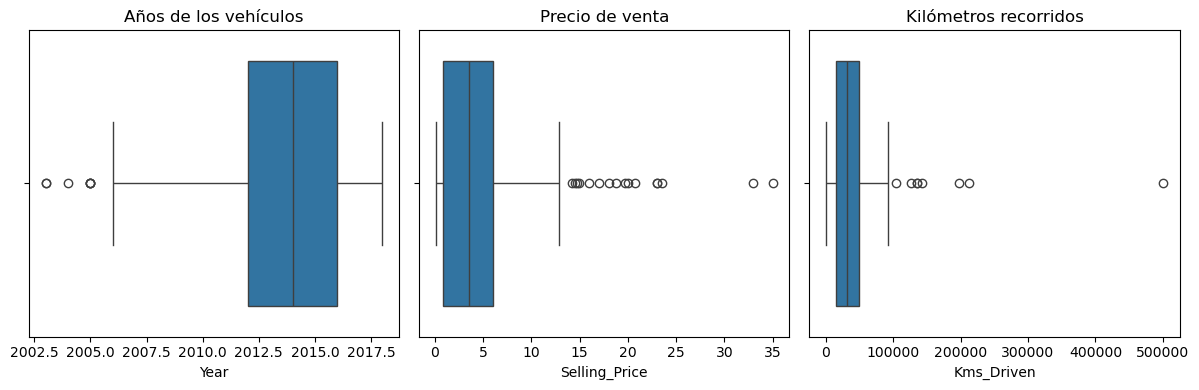

In [173]:
# Visualización de boxplots para detectar outliers
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(x=car_data['Year'])
plt.title('Años de los vehículos')


plt.subplot(1, 3, 2)
sns.boxplot(x=car_data['Selling_Price'])
plt.title('Precio de venta')

plt.subplot(1, 3, 3)
sns.boxplot(x=car_data['Kms_Driven'])
plt.title('Kilómetros recorridos')

plt.tight_layout()
plt.show()

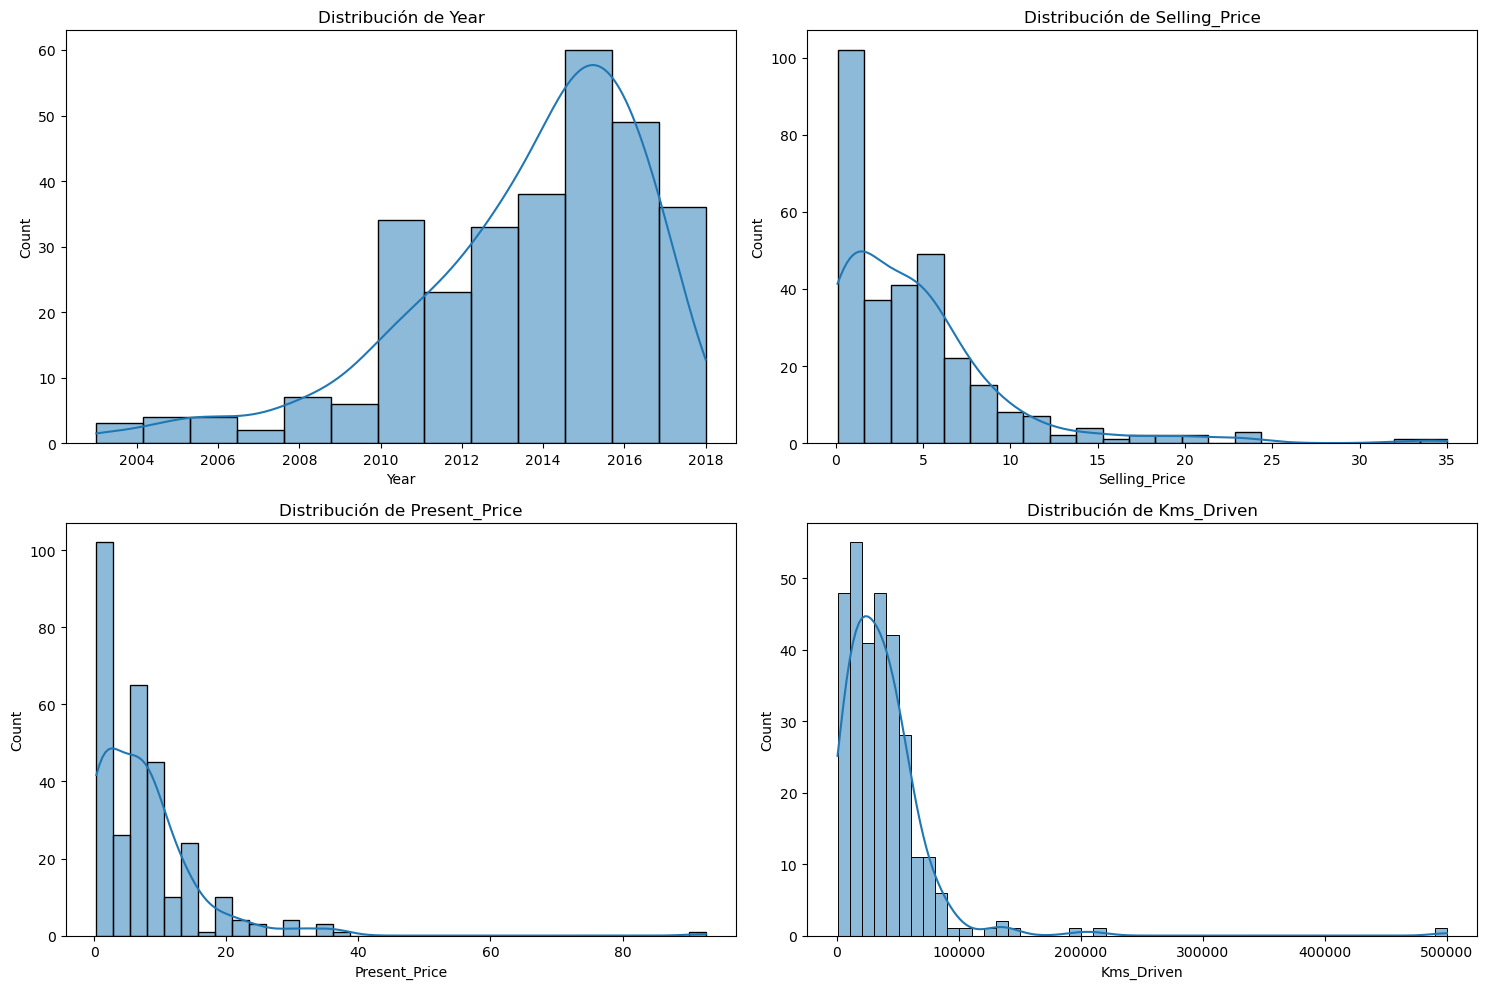

In [239]:
column_year = 'Year'
column_selling_price = 'Selling_Price'
column_present_price = 'Present_Price'
column_kms_driven = 'Kms_Driven'

numeric_cols = [column_year, column_selling_price, column_present_price, column_kms_driven]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    sns.histplot(car_data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

In [219]:
print(car_data.columns)


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Owner', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel_True',
       'Seller_Type_Individual_True', 'Transmission_Manual_True'],
      dtype='object')


In [227]:
# Dividir el dataset en Train y Test
X = car_data.drop(['Selling_Price', 'Car_Name'], axis=1)  # Asegúrate de no incluir 'Car_Name'
y = car_data['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [233]:
# Evaluar el desempeño
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 5.38764896728197
R² Score: 0.7909597581854955


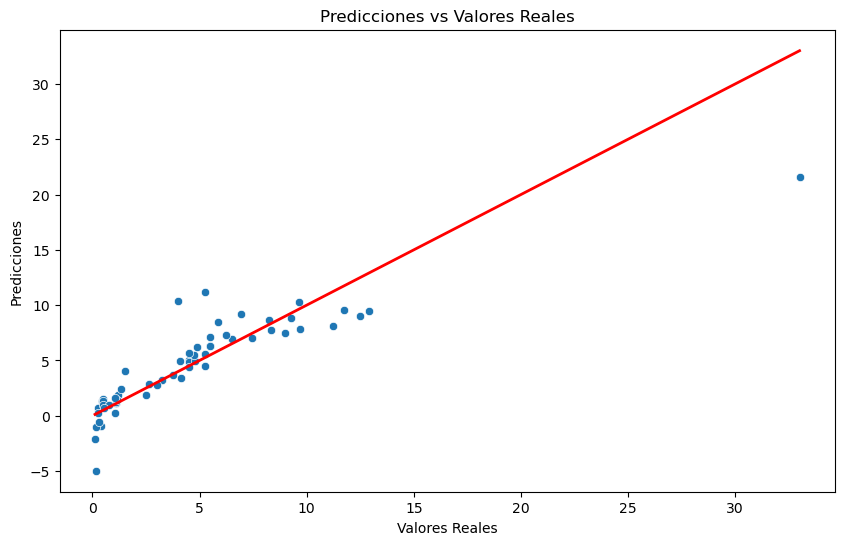

In [237]:
# Visualizar resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Línea de referencia
plt.show()

**Información General del Dataset**

**Estructura del Dataset**: El conjunto de datos contiene 301 entradas y 9 columnas, lo que permite un análisis efectivo de los vehículos.

**Estadísticas Descriptivas**

**Años de los Vehículos**: Los vehículos varían desde 2003 hasta 2018, lo que proporciona una buena representación de diferentes generaciones.

**Precios**: El precio de venta promedio es de aproximadamente $6,000, con un rango que va desde $120 hasta $42,000. Esto sugiere que hay vehículos en varios segmentos de precios, desde opciones económicas hasta vehículos de lujo.

**Kilometraje Promedio**: Con un promedio de 36,947 km, los vehículos están en un rango de uso moderado.
Valores Nulos
**Falta de Valores Nulos**: No hay valores faltantes en el dataset, lo que es positivo y facilita el análisis.
Distribución de Variables Numéricas
**Distribuciones**: Los precios y el kilometraje muestran una concentración en los rangos más bajos, lo que indica que la mayoría de los vehículos son más accesibles.
**Relaciones Entre Variables**
**Precio Actual vs. Precio de Venta**: Hay una fuerte relación positiva entre el precio actual y el precio de venta, lo que significa que un precio más alto suele indicar un vehículo de mejor calidad.
**Año vs. Precio de Venta**: Los vehículos más nuevos tienden a tener precios de venta más altos, reflejando su mejor tecnología y características.
**Tipo de Combustible**: Los vehículos diésel tienden a tener precios de venta más altos que los de gasolina, lo que puede estar relacionado con su eficiencia y durabilidad.
Correlaciones
**Correlaciones**: La fuerte correlación entre el precio actual y el precio de venta (0.88) sugiere que el precio actual es un buen indicador del valor de venta. La correlación moderada entre el año y el precio de venta (0.23) indica que aunque los vehículos más nuevos suelen costar más, otros factores también influyen.
**Kilómetros Recorridos**: Hay una leve tendencia a que los vehículos con más kilómetros tengan precios de venta más bajos.
Contenidos de Vendedores y Transmisión
**Tipo de Vendedor**: La mayoría de los vehículos son vendidos por concesionarios, lo que sugiere que esta es una fuente principal de vehículos.
**Transmisión**: Hay más vehículos con transmisión manual, lo que puede indicar una preferencia del mercado.
Relación entre Kilómetros y Precio
***Tendencia de Precios**: Generalmente, los vehículos con menos kilómetros tienen precios más altos, lo cual es lógico.
Evaluación del Modelo
R²: Un R² cercano a 1 indica que el modelo puede explicar bien la variación en el precio de venta.
**MSE/MAE**: Estas métricas indican cuán precisas son las predicciones del modelo; valores más bajos son mejores.
Distribución de Residuos: Residuos que están distribuidos aleatoriamente alrededor de 0 sugieren que el modelo se ajusta bien.
**Conclusión**
El análisis revela relaciones significativas entre las variables que pueden ser útiles para estimar el precio de venta de vehículos. La buena calidad de los datos proporciona un sólido punto de partida para futuros modelos predictivos